<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [65]:
import pandas as pd
# Pandas library used for data analysis and manipulation
import numpy as np
#Numpy library used for Mathematical operations
#Seaborn and Matplotlib libraries are used for plotting 
import seaborn as sns
import matplotlib.pyplot as plt

**Importing/Loading dataset**

In [66]:
car_dataset = pd.read_csv('adverts.csv')

**Checking size of the data in rows and columns**

In [67]:
car_dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [68]:
print("The given dataset has {} data points".format(car_dataset.shape[0]))
print("The given dataset has {} features".format(car_dataset.shape[1]))
car_dataset.shape  #Displays the total count of Rows and Colums details from the dataset.

The given dataset has 402005 data points
The given dataset has 12 features


(402005, 12)

In [69]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [70]:
car_dataset.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [71]:
car_dataset.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [72]:
car_dataset.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [73]:
#Repersenting Categorical Features
car_dataset.describe(include=[object])

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,370148,396627,402005,402005,402005,401168,401404
unique,72,22,110,1168,2,16,9
top,17,Black,BMW,Golf,USED,Hatchback,Petrol
freq,36738,86287,37376,11583,370756,167315,216929


**Finding Missing Values**

In [74]:
car_dataset.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

**Finding Missing Values using Heatmap**

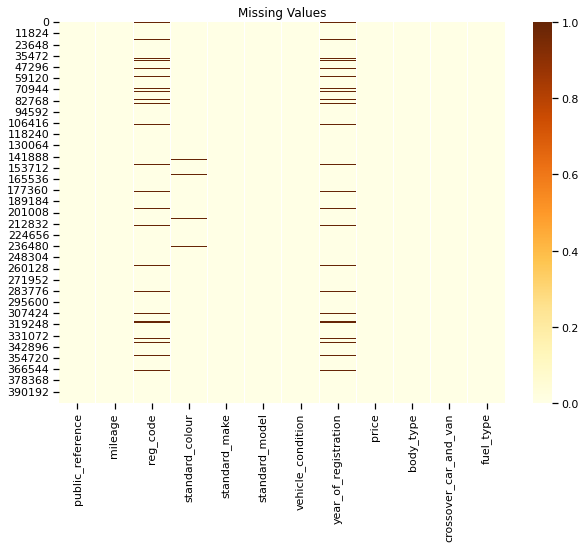

In [75]:
plt.figure(figsize=(10,7)) 
sns.heatmap(car_dataset.isna(), cmap='YlOrBr')
plt.title("Missing Values") 
plt.show()

In [76]:
car_dataset = car_dataset.drop(['public_reference','reg_code'], axis=1)

In [77]:
car_dataset['body_type'] = car_dataset['body_type'].fillna(car_dataset['body_type'].mode()[0])
car_dataset['fuel_type'] = car_dataset['fuel_type'].fillna(car_dataset['fuel_type'].mode()[0])
car_dataset['standard_colour'] = car_dataset['standard_colour'].fillna(car_dataset['standard_colour'].mode()[0])
car_dataset['mileage'] = car_dataset['mileage'].fillna(car_dataset['mileage'].median())
car_dataset['year_of_registration'] = car_dataset['year_of_registration'].fillna(car_dataset['year_of_registration'].mode()[0])

In [78]:
car_dataset=car_dataset[~car_dataset['fuel_type'].isna()]
car_dataset=car_dataset[~car_dataset['body_type'].isna()]
car_dataset=car_dataset[~car_dataset['standard_colour'].isna()]
car_dataset=car_dataset[~car_dataset['mileage'].isna()]
car_dataset=car_dataset[~car_dataset['year_of_registration'].isna()]

In [79]:
car_dataset['mileage'] = car_dataset['mileage'].astype(int)
car_dataset['year_of_registration'] = car_dataset['year_of_registration'].astype(int)
car_dataset["crossover_car_and_van"] = car_dataset["crossover_car_and_van"].astype(int)

In [80]:
car_dataset.dtypes

mileage                   int64
standard_colour          object
standard_make            object
standard_model           object
vehicle_condition        object
year_of_registration      int64
price                     int64
body_type                object
crossover_car_and_van     int64
fuel_type                object
dtype: object

In [81]:
car_dataset.isnull().sum()

mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
p=sns.pairplot(car_dataset, hue = 'price')

In [18]:
car_dataset['year_of_registration'].unique()

array([2017, 2011, 2016, 2015, 2013, 2008, 2019, 2010, 2012, 2018, 2009,
       1984, 2014, 2003, 2006, 2020, 2005, 2000, 2002, 2007, 2004, 1991,
       2001, 1986, 1998, 1990, 1993, 1987, 1994, 1999, 1970, 1988, 1995,
       1997, 1969, 1992, 1989, 1996, 1976, 1983, 1980, 1973, 1962, 1967,
       1972, 1982, 1968, 1979, 1964, 1933, 1981, 1985, 1978, 1971, 1974,
       1966, 1977, 1961, 1965, 1007, 1957, 1515, 1963, 1063, 1954, 1975,
       1955, 1009, 1016, 1960, 1956, 1959, 1909, 1934, 1958, 1010, 1950,
       1008, 1018,  999, 1017, 1952, 1006, 1015])

In [19]:
car_dataset['price'].unique()

array([73970,  7000, 14000, ..., 47910, 35023, 58987])

In [20]:
car_dataset['fuel_type'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', 'Bi Fuel',
       'Natural Gas'], dtype=object)

In [21]:
car_dataset['fuel_type'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', 'Bi Fuel',
       'Natural Gas'], dtype=object)

In [22]:
#Let's check some unique values in data set using unique()
print(car_dataset['fuel_type'].unique())
print(car_dataset['standard_make'].unique())
print(car_dataset['body_type'].unique())
print(car_dataset['vehicle_condition'].unique())
print(car_dataset['standard_colour'].unique())

['Petrol Plug-in Hybrid' 'Diesel' 'Petrol' 'Diesel Hybrid' 'Petrol Hybrid'
 'Electric' 'Diesel Plug-in Hybrid' 'Bi Fuel' 'Natural Gas']
['Volvo' 'Jaguar' 'SKODA' 'Vauxhall' 'Land Rover' 'Audi' 'Mercedes-Benz'
 'Volkswagen' 'Peugeot' 'SEAT' 'MINI' 'BMW' 'Nissan' 'Mitsubishi'
 'Ferrari' 'Citroen' 'Toyota' 'Kia' 'Renault' 'Fiat' 'Honda' 'Bentley'
 'DS AUTOMOBILES' 'Hyundai' 'Aston Martin' 'McLaren' 'Smart' 'Alfa Romeo'
 'Porsche' 'Abarth' 'Mazda' 'Suzuki' 'MG' 'Dacia' 'Subaru' 'SsangYong'
 'Maserati' 'Saab' 'Rolls-Royce' 'Lexus' 'Jeep' 'Panther' 'Chevrolet'
 'Lamborghini' 'Daihatsu' 'Dodge' 'Isuzu' 'Lotus' 'Tesla' 'TVR' 'GMC'
 'Rover' 'Cadillac' 'Infiniti' 'Alpine' 'Chrysler' 'Triumph' 'Morgan'
 'Dax' 'London Taxis International' 'Daimler' 'CUPRA' 'Perodua' 'Lincoln'
 'Bugatti' 'Great Wall' 'Replica' 'Opel' 'AC' 'Proton' 'Lancia' 'Austin'
 'Morris' 'Westfield' 'Maybach' 'Corvette' 'Tiger' 'LEVC' 'Iveco'
 'Caterham' 'Hummer' 'Carbodies' 'Jensen' 'International' 'Daewoo'
 'Pagani' 'Wolseley

In [23]:
car_dataset.head(50)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0,Grey,Volvo,XC90,NEW,2017,73970,SUV,0,Petrol Plug-in Hybrid
1,108230,Blue,Jaguar,XF,USED,2011,7000,Saloon,0,Diesel
2,7800,Grey,SKODA,Yeti,USED,2017,14000,SUV,0,Petrol
3,45000,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,0,Diesel
4,64000,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,0,Diesel
5,16000,Blue,Audi,S5,USED,2017,29000,Convertible,0,Petrol
6,24075,Red,Vauxhall,Viva,USED,2017,5861,Hatchback,0,Petrol
7,99000,Bronze,Land Rover,Range Rover,USED,2013,24475,SUV,0,Diesel
8,111236,Black,Mercedes-Benz,S Class,USED,2008,6995,Limousine,0,Diesel
9,9500,White,Land Rover,Range Rover,USED,2019,79995,SUV,0,Diesel


In [24]:
car_dataset.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0,Grey,Volvo,XC90,NEW,2017,73970,SUV,0,Petrol Plug-in Hybrid
1,108230,Blue,Jaguar,XF,USED,2011,7000,Saloon,0,Diesel
2,7800,Grey,SKODA,Yeti,USED,2017,14000,SUV,0,Petrol
3,45000,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,0,Diesel
4,64000,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,0,Diesel


In [25]:
car_dataset.shape

(402005, 10)

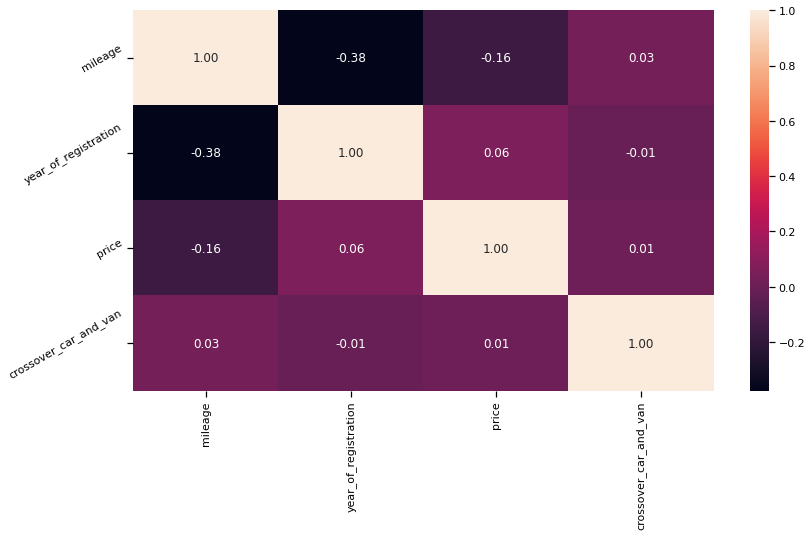

In [26]:
corr = car_dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [27]:
car_dataset.describe(include='object')

,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type
count,402005,402005,402005,402005,402005,402005
unique,22,110,1168,2,16,9
top,Black,BMW,Golf,USED,Hatchback,Petrol
freq,91665,37376,11583,370756,168152,217530


In [28]:
car_dataset.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'price', 'body_type',
       'crossover_car_and_van', 'fuel_type'],
      dtype='object')

In [29]:
car_dataset=car_dataset[car_dataset['price']<6000000]

In [30]:
car_dataset['standard_make'].unique()

array(['Volvo', 'Jaguar', 'SKODA', 'Vauxhall', 'Land Rover', 'Audi',
       'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'SEAT', 'MINI', 'BMW',
       'Nissan', 'Mitsubishi', 'Ferrari', 'Citroen', 'Toyota', 'Kia',
       'Renault', 'Fiat', 'Honda', 'Bentley', 'DS AUTOMOBILES', 'Hyundai',
       'Aston Martin', 'McLaren', 'Smart', 'Alfa Romeo', 'Porsche',
       'Abarth', 'Mazda', 'Suzuki', 'MG', 'Dacia', 'Subaru', 'SsangYong',
       'Maserati', 'Saab', 'Rolls-Royce', 'Lexus', 'Jeep', 'Panther',
       'Chevrolet', 'Lamborghini', 'Daihatsu', 'Dodge', 'Isuzu', 'Lotus',
       'Tesla', 'TVR', 'GMC', 'Rover', 'Cadillac', 'Infiniti', 'Alpine',
       'Chrysler', 'Triumph', 'Morgan', 'Dax',
       'London Taxis International', 'Daimler', 'CUPRA', 'Perodua',
       'Lincoln', 'Bugatti', 'Great Wall', 'Replica', 'Opel', 'AC',
       'Proton', 'Lancia', 'Austin', 'Morris', 'Westfield', 'Maybach',
       'Corvette', 'Tiger', 'LEVC', 'Iveco', 'Caterham', 'Hummer',
       'Carbodies', 'Jensen', 'Int

In [31]:
car_dataset['standard_model'].unique()

array(['XC90', 'XF', 'Yeti', ..., 'Sera', 'Pininfarina', '480'],
      dtype=object)

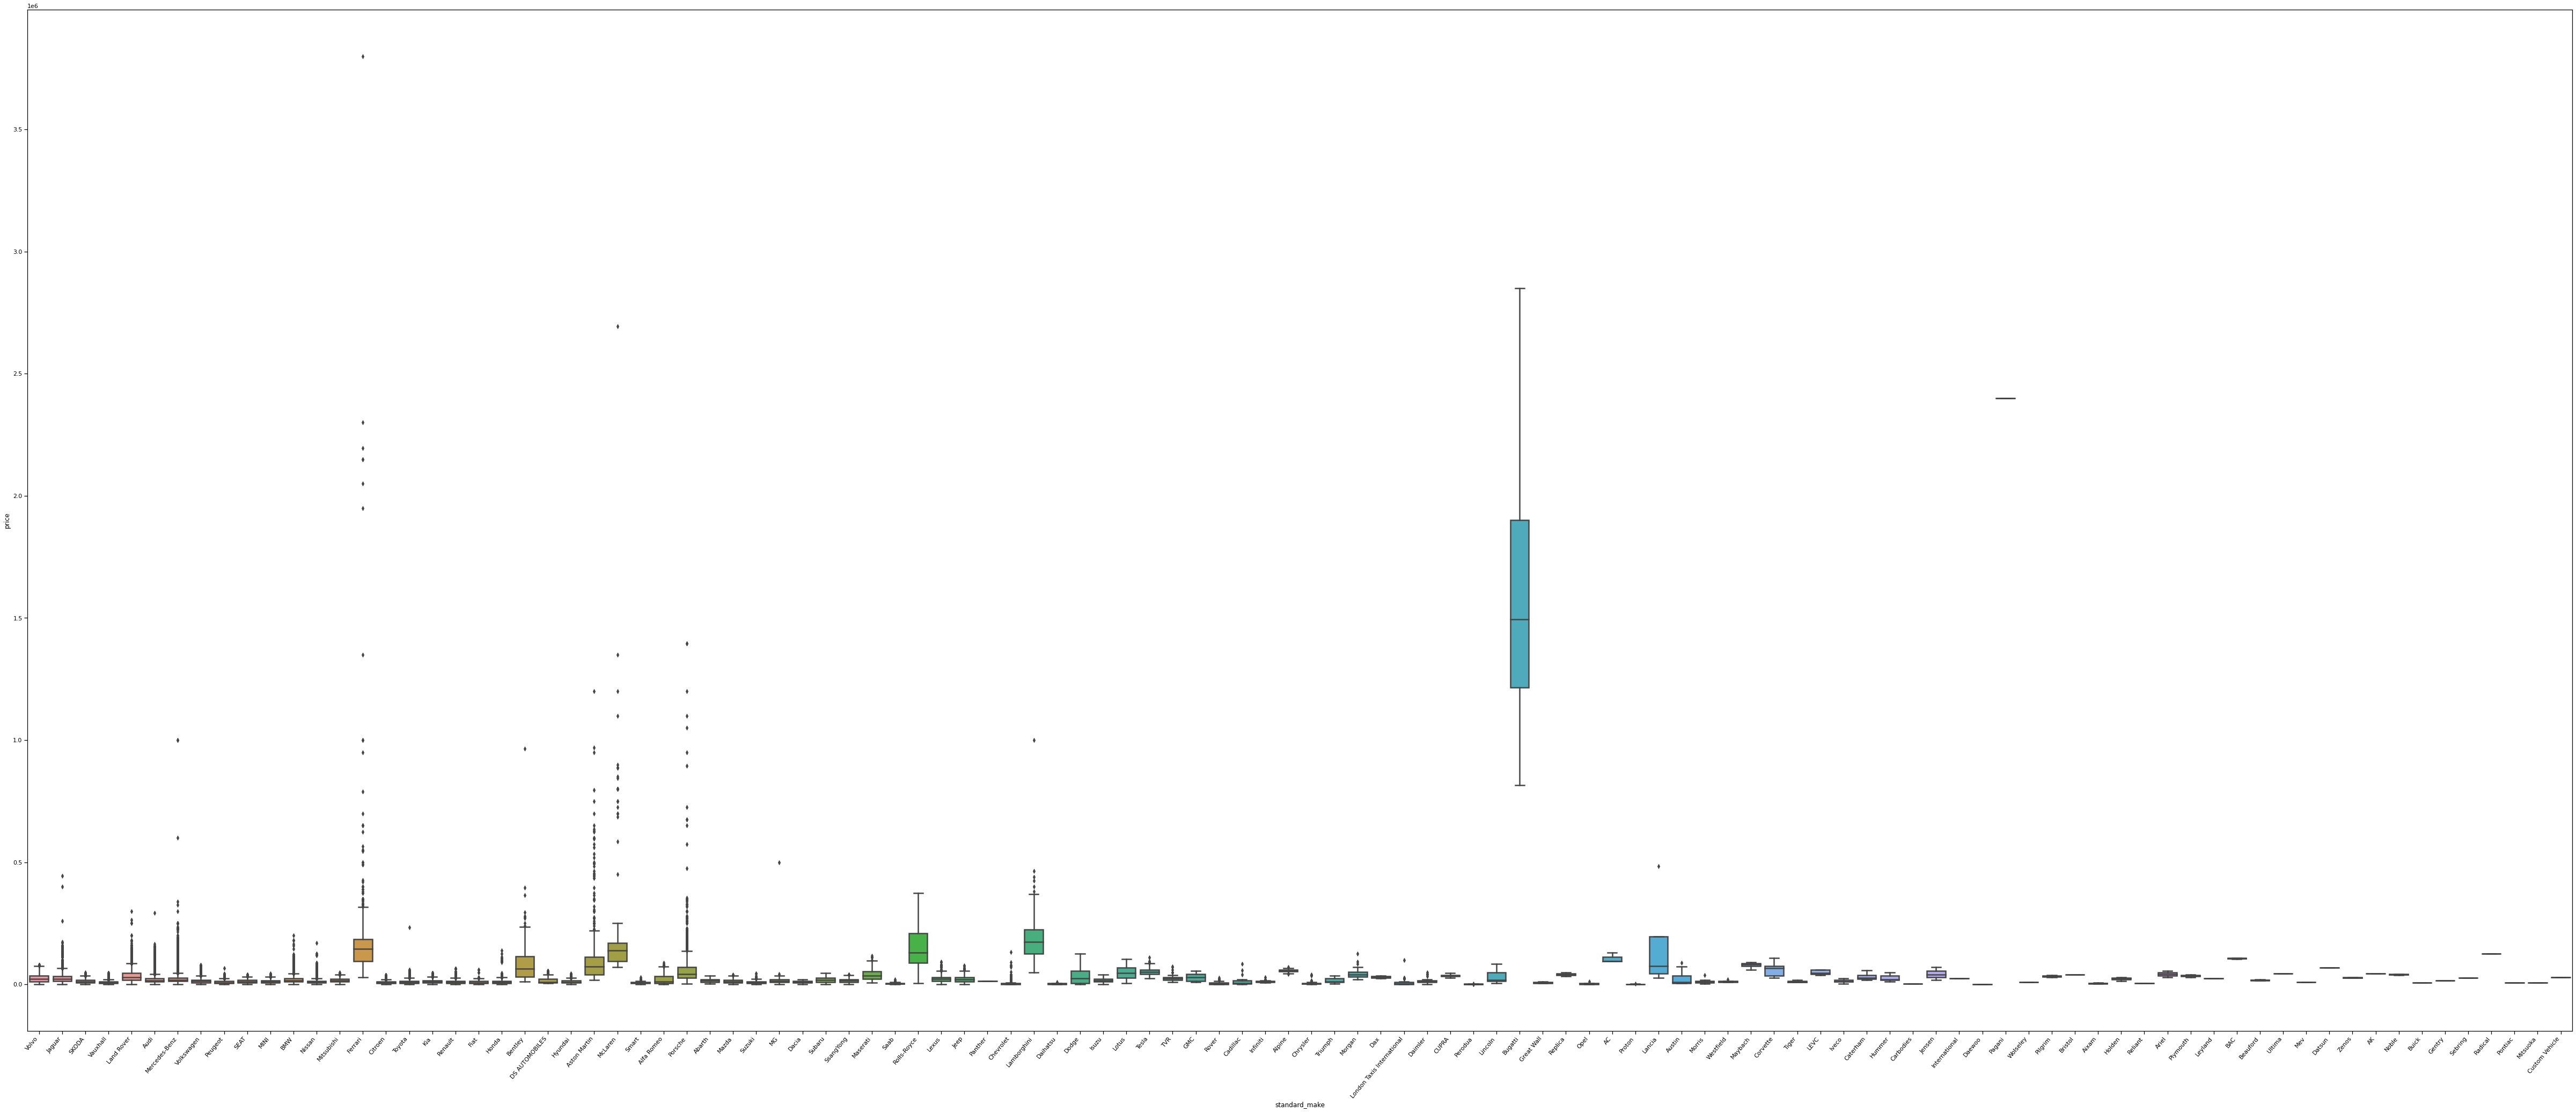

In [32]:
import seaborn as sns
plt.subplots(figsize=(85,35))
ax=sns.boxplot(x='standard_make',y='price',data=car_dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
plt.show()

In [33]:
car_dataset.columns

Index(['mileage', 'standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'price', 'body_type',
       'crossover_car_and_van', 'fuel_type'],
      dtype='object')

**Data Pre-Processing**

In [45]:
X=car_dataset.drop(columns='price')
y=car_dataset['price']

In [49]:
y

0         73970
1          7000
2         14000
3          7995
4         26995
          ...  
402000    10595
402001     2000
402002     7250
402003    11490
402004    20520
Name: price, Length: 401999, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [52]:
ohe=OneHotEncoder()
ohe.fit(X[['standard_make','standard_model','standard_colour','vehicle_condition','body_type','fuel_type']])

OneHotEncoder()

In [53]:
ohe.categories_

[array(['AC', 'AK', 'Abarth', 'Aixam', 'Alfa Romeo', 'Alpine', 'Ariel',
        'Aston Martin', 'Audi', 'Austin', 'BAC', 'BMW', 'Beauford',
        'Bentley', 'Bristol', 'Bugatti', 'Buick', 'CUPRA', 'Cadillac',
        'Carbodies', 'Caterham', 'Chevrolet', 'Chrysler', 'Citroen',
        'Corvette', 'Custom Vehicle', 'DS AUTOMOBILES', 'Dacia', 'Daewoo',
        'Daihatsu', 'Daimler', 'Datsun', 'Dax', 'Dodge', 'Ferrari', 'Fiat',
        'GMC', 'Gentry', 'Great Wall', 'Holden', 'Honda', 'Hummer',
        'Hyundai', 'Infiniti', 'International', 'Isuzu', 'Iveco', 'Jaguar',
        'Jeep', 'Jensen', 'Kia', 'LEVC', 'Lamborghini', 'Lancia',
        'Land Rover', 'Lexus', 'Leyland', 'Lincoln',
        'London Taxis International', 'Lotus', 'MG', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mev',
        'Mitsubishi', 'Mitsuoka', 'Morgan', 'Morris', 'Nissan', 'Noble',
        'Opel', 'Pagani', 'Panther', 'Perodua', 'Peugeot', 'Pilgrim',
        'Plymouth', 'Pontia

In [54]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['standard_make','standard_model','standard_colour','vehicle_condition','body_type','fuel_type']),remainder='passthrough')

**Model Implementation**

In [55]:
lr=LinearRegression()

In [56]:
pipe=make_pipeline(column_trans,lr)

In [57]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AC', 'AK', 'Abarth', 'Aixam', 'Alfa Romeo', 'Alpine', 'Ariel',
       'Aston Martin', 'Audi', 'Austin', 'BAC', 'BMW', 'Beauford',
       'Bentley', 'Bristol', 'Bugatti', 'Buick', 'CUPRA', 'Cadillac',
       'Carbodies', 'Caterham', 'Chevrolet', 'Chrys...
       'Minibus', 'Panel Van', 'Pickup', 'SUV', 'Saloon', 'Window Van'],
      dtype=object),
                                                                            array(['Bi Fuel', 'Diesel', 'Diesel Hybrid', 'Diesel Plug-in Hybrid',
       'Electric', 'Natural Gas', 'Petrol', 'Petrol Hybrid',
       'Petrol Plug-in Hybrid'], dtype=object)]),
                                                  ['standard_make',
                                                   'standard_model',
        

In [58]:
y_pred=pipe.predict(X_test)

In [59]:
y_pred

array([ 6418.3705987 , 18496.88487417, 15586.29955209, ...,
       29958.7524244 , 22152.77915615,  8753.42889164])

In [60]:
r2_score(y_test,y_pred)

0.7398076134050802

In [61]:
scores=[]
for i in range (1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [62]:
np.argmax(scores)

141

In [63]:
scores[np.argmax(scores)]

0.859611578003645

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.859611578003645

In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
#dtr = DecisionTreeRegressor()
#model(dtr,X_train,y_train,X_test,y_test)

In [ ]:
DecisionTreeRegressor() 

In [34]:

#X= car_dataset[['mileage','standard_colour', 'standard_make',
 #      'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
  #     'body_type', 'crossover_car_and_van']]
#y=car_dataset['price']

In [35]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
#from sklearn.pipeline import make_pipeline
#from sklearn.metrics import r2_score

In [36]:
#ohe=OneHotEncoder()
#ohe.fit(X[['standard_colour','standard_make','standard_model', 'vehicle_condition','body_type']])


OneHotEncoder()

In [37]:
#column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['standard_colour','standard_make','standard_model', 'vehicle_condition','body_type']),
 #                                   remainder='passthrough')

In [38]:
#lr=LinearRegression()

In [39]:
#pipe=make_pipeline(column_trans,lr)

In [40]:
#pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Beige', 'Black', 'Blue', 'Bronze', 'Brown', 'Burgundy', 'Gold',
       'Green', 'Grey', 'Indigo', 'Magenta', 'Maroon', 'Multicolour',
       'Navy', 'Orange', 'Pink', 'Purple', 'Red', 'Silver', 'Turquoise',
       'White', 'Yellow'], dtype=object),
                                                                            a...
                                                                            array(['NEW', 'USED'], dtype=object),
                                                                            array(['Camper', 'Car Derived Van', 'Chassis Cab', 'Combi Van',
       'Convertible', 'Coupe', 'Estate', 'Hatchback', 'Limousine', 'MPV',
       'Minibus', 'Panel Van', 'Pickup', 'SUV', 'Saloon', 'Window Van'],
      dtype=object)]

In [41]:
#y_pred=pipe.predict(X_test)

In [42]:
#r2_score(y_test,y_pred)

1.0

In [43]:
###
#scores=[]
#for i in range(1000):
 #   X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
  #  lr=LinearRegression()
  #  pipe=make_pipeline(column_trans,lr)
   # pipe.fit(X_train,y_train)
   # y_pred=pipe.predict(X_test)
  #  scores.append(r2_score(y_test,y_pred))
#np.argmax(scores)
###

KeyboardInterrupt: ignored

In [ ]:
#np.argmax(scores)

In [ ]:
#scores[np.argmax(scores)]

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
#lr=LinearRegression()
#pipe=make_pipeline(column_trans,lr)
#pipe.fit(X_train,y_train)
#y_pred=pipe.predict(X_test)
#r2_score(y_test,y_pred)